In [2]:
import numpy as np
import pandas as pd


# 8장 데이터 준비하기 : 조인, 병합, 변형
## 8.1. pandas.merge() 병합
  * 특정 열을 기준으로 두 데이터프레임을 병합하며, 이때 기준이 되는 열을 지정하여 조인을 수행
  * 종류에는 내부 조인(inner join), 외부 조인(outer join), 왼쪽 조인(left join), 오른쪽 조인(right join) 등 

## 1. One-to-One merge
* 동작 원리:
  * 두 개의 데이터프레임을 병합할 때 기준이 되는 열을 선택-  이 열은 두 데이터프레임 모두에 존재해야 함
  * 데이터프레임을 병합할 때, 지정된 열을 기준으로 한 쌍의 행을 찾아서 이를 병합.
     - 예를 들어, 첫 번째 데이터프레임의 특정 열에서 지정된 열의 값이 "A"이고, 두 번째 데이터프레임에서도 이와 동일한 열에 대해 값 "A"를 가지는 행이 존재한다면, 이 두 행을 하나로 합친다.
  * 결과적으로, 병합된 데이터프레임에서 각 행은 하나의 행과 하나의 행이 매칭된 결과이므로, 이러한 방식을 "one-to-one" merge라고 함.

In [3]:
#  데이터프레임 생성 : list, dictionary
import pandas as pd
data1 = {"col1":["a","b","c"], "col2":[1,2,3]}
data2 = {"col1":["a","b","d"], "col3":[10,20,30]}

df1 = pd.DataFrame(data1) # 3*2 table
df2 = pd.DataFrame(data2)

print(df1, "\n\n", df2)

  col1  col2
0    a     1
1    b     2
2    c     3 

   col1  col3
0    a    10
1    b    20
2    d    30


### 1) 매개변수 : on
* 합칠 때 기준이 되는 열을 지정
* 이 열은 두 데이터프레임에 모두 존재
* 공통된 열이 1개인 경우 on 생략 가능

In [5]:
# ex
pd.merge(df1, df2, on = "col1")  

,col1,col2,col3
0,a,1,10
1,b,2,20


### 2) 매개변수 : how = "inner"
* 기본값은 inner인 경우 how 생략가능
* how='inner' (기본값): 양쪽 데이터프레임에 모두 존재하는 행에 대해서만 병합. 이 경우, 교집합에 해당하는 행만 남게됨.
* 내부 조인은 두 데이터프레임에서 공통된 값이 존재하는 행만을 남기는 조인 방식

In [6]:
#ex
print(df1,"\n\n",df2)
pd.merge(df1, df2,  on = "col1", how = "inner")

  col1  col2
0    a     1
1    b     2
2    c     3 

   col1  col3
0    a    10
1    b    20
2    d    30


,col1,col2,col3
0,a,1,10
1,b,2,20


### 3) 매개변수 : how = "left"
* 두 데이터프레임에 공통된 열이 존재해야 한다.
* 동작원리:
  * 왼쪽 데이터프레임을 기준으로 한다. 즉, 왼쪽 데이터프레임의 모든 행을 유지한다.
  * 왼쪽 데이터프레임의 각 행에 대해 오른쪽 데이터프레임에서 동일한 값을 가지는 행을 찾는다. 이를 위해 두 데이터프레임에서 지정된 열을 비교한다.
  * 만약 오른쪽 데이터프레임에서 해당 값을 가진 행이 없다면, 누락된 값 (NaN)으로 대체한다.

In [7]:
# ex
print(df1, "\n\n", df2)
pd.merge(df1, df2, on = "col1", how = "left") 

  col1  col2
0    a     1
1    b     2
2    c     3 

   col1  col3
0    a    10
1    b    20
2    d    30


,col1,col2,col3
0,a,1,10.0
1,b,2,20.0
2,c,3,NaN


## 4) 매개변수 : how = "right"
* 두 데이터프레임에 공통된 열이 존재해야 한다.
* 동작원리
  * 오른쪽 데이터프레임을 기준으로 모든 행을 유지한다..
  * 오른쪽 데이터프레임의 각 행에 대해 왼쪽 데이터프레임에서 동일한 값을 가지는 행을 찾는다. 이를 위해 두 데이터프레임에서 지정된 열을 비교한다.
  * 만약 왼쪽 데이터프레임에서 해당 값을 가진 행이 없다면, 누락된 값 (NaN)으로 대체

In [9]:
# ex
print(df1, "\n\n", df2)
pd.merge(df1, df2, on = "col1", how="right") 
pd.merge(df1, df2, how="right") 

  col1  col2
0    a     1
1    b     2
2    c     3 

   col1  col3
0    a    10
1    b    20
2    d    30


,col1,col2,col3
0,a,1.0,10
1,b,2.0,20
2,d,NaN,30


### 5) 매개변수 : how = "outer"
* 동작원리
  * 왼쪽 데이터프레임과 오른쪽 데이터프레임의 모든 행을 포함
  * 두 데이터프레임의 공통된 값을 기준으로 행을 병합. 만약 두 데이터프레임에 공통된 값이 없다면, 누락된 값 (NaN)으로 대체

In [10]:
#ex
print(df1,"\n\n", df2)
pd.merge(df1, df2, on = "col1", how="outer") 

  col1  col2
0    a     1
1    b     2
2    c     3 

   col1  col3
0    a    10
1    b    20
2    d    30


,col1,col2,col3
0,a,1.0,10.0
1,b,2.0,20.0
2,c,3.0,NaN
3,d,NaN,30.0


### 6) 매개변수 : left_on과 right_on
* 기본적으로, merge() 함수는 동일한 이름의 열을 기준으로 조인함.
* 하지만 경우에 따라 왼쪽 데이터프레임과 오른쪽 데이터프레임에 동일한 이름의 열이 없는 경우
  * left_on과 right_on을 사용하여 다른 열을 기준으로 조인할 수 있다.
* 동작 원리
  * left_on: 왼쪽 데이터프레임에서 조인할 열을 지정. 이 열은 왼쪽 데이터프레임에 존재해야 함
  * right_on: 오른쪽 데이터프레임에서 조인할 열을 지정. 이 열은 오른쪽 데이터프레임에 존재해야 함
  * left_on과 right_on에 지정된 열의 값이 일치하는 행을 찾아서 조인함.

In [13]:
# ex
# 첫 번째 데이터프레임 생성
data1 = {'key': [1, 2],
         'value': ['A', 'B']}
df1 = pd.DataFrame(data1)

# 두 번째 데이터프레임 생성
data2 = {'id': [1, 2, 3],
         'category': ['X', 'Y', 'Z']}
df2 = pd.DataFrame(data2)

# df1과 df2를 'key'와 'id' 열을 기준으로 조인하여 merged_df 생성
merged_df = pd.merge(df1, df2, left_on='key', right_on='id', how="inner")

# 결과 출력
print(df1,"\n\n",df2)
print(merged_df)


   key value
0    1     A
1    2     B 

    id category
0   1        X
1   2        Y
2   3        Z
   key value  id category
0    1     A   1        X
1    2     B   2        Y


### 7) 매개변수 : left_index과 right_index
* 인덱스를 기준으로 조인
* 기본적으로 인덱스 값이 일치하는 행끼리 조인을 수행.
* 동일한 이름의 열이 존재할 경우에는 첫 번째 데이터프레임의 열 이름에는 _x 접미사, 두 번째 데이터프레임의 열 이름에는 _y 접미사가 붙는다
* 동작 원리
  * left_index: 왼쪽 데이터프레임의 인덱스를 기준으로 조인함. 기본값은 False이며, True로 설정하면 왼쪽 데이터프레임의 인덱스를 기준으로 조인.
  * right_index: 오른쪽 데이터프레임의 인덱스를 기준으로 조인. 기본값은 False이며, True로 설정하면 오른쪽 데이터프레임의 인덱스를 기준으로 조인.
  * 만약 left_index와 right_index 둘 다 True로 설정되어 있다면, 각각의 데이터프레임의 인덱스를 기준으로 조인

In [16]:
#ex1
data1 = {"col1":["a","b","c"], "col2":[1,2,3]}
data2 = {"col1":["a","b","d"], "col4":[10,20,30]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
print(df1, "\n\n", df2)
pd.merge(df1, df2, right_index = True, left_index = True, how="inner")

  col1  col2
0    a     1
1    b     2
2    c     3 

   col1  col4
0    a    10
1    b    20
2    d    30


,col1_x,col2,col1_y,col4
0,a,1,a,10
1,b,2,b,20
2,c,3,d,30


In [19]:
# 복습 : DataFrame & Series
data1 = {"name":["a","b","c"], "year":[1,2,3]} 
data2 = [100, 50, 40] # page_count
df1 = pd.DataFrame(data1) # dataframe
df2 = pd.Series(data2, name="page_count")  # Series
print(df1, "\n\n", df2)
pd.merge(df1, df2, right_index = True, left_index = True, how="inner")

  name  year
0    a     1
1    b     2
2    c     3 

 0    100
1     50
2     40
Name: page_count, dtype: int64


,name,year,page_count
0,a,1,100
1,b,2,50
2,c,3,40


## 2. many-to-One merge
    * 한쪽 데이터프레임의 특정 열에 중복된 여러 행의 값이 있고, 다른쪽 데이터프레임의 해당 값과 일치하는 경우을 표현
    * 동작 원리
        * 기준이 되는 데이터프레임을 선택. 일반적으로는 행의 개수가 많은 쪽을 기준으로 선택
        * 기준이 되는 데이터프레임의 중복된 값에 해당하는 행들이 다른 데이터프레임의 해당 값을 가진 행과 조인    

### [문제] 고객 정보와 주문 정보를 포함하는 두 개의 데이터프레임이 있다고 가정. 
* 여러 주문이 하나의 고객에 의해 생성된다면, 이는 many-to-one 조인에 해당. 
* 이 경우, 고객 정보 데이터프레임의 고객 ID 열과 주문 정보 데이터프레임의 고객 ID 열을 기준으로 조인하여, 
* 각 주문이 해당하는 고객의 정보와 함께 표시

In [22]:
# 첫 번째 데이터프레임 생성 
data1 = {'customer_id': [1, 2, 3, 4, 4],
         'customer_name': ['경수', '철수', '영수', '강수', '강수']}
df1 = pd.DataFrame(data1)

# 두 번째 데이터프레임 생성
data2 = {'customer_id': [1, 2, 3, 4],
         'order_id': [101, 102, 103, 104]}
df2 = pd.DataFrame(data2)

## df1은 많은(many) 쪽이고, df2는 하나(one) 쪽
## on='customer_id'는 조인할 열을 지정하고, 
## how='left'는 왼쪽 데이터프레임(df2)을 기준으로 조인
##최종적으로는 많은(many) 쪽인 df1의 정보가 유지되면서 하나(one) 쪽인 df2의 정보가 추가

merged_df = pd.merge(df1, df2, on='customer_id', how='outer')

# 결과 출력
print(df1, "\n\n", df2)
print(merged_df)

   customer_id customer_name
0            1            경수
1            2            철수
2            3            영수
3            4            강수
4            4            강수 

    customer_id  order_id
0            1       101
1            2       102
2            3       103
3            4       104
   customer_id customer_name  order_id
0            1            경수       101
1            2            철수       102
2            3            영수       103
3            4            강수       104
4            4            강수       104


### [예제]     

In [23]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"],
                    "data1": pd.Series(range(7), dtype="Int64")})

df2 = pd.DataFrame({"key": ["a", "b", "d"],
                    "data2": pd.Series(range(3), dtype="Int64")})

print(df1, "\n\n", df2)

pd.merge(df1, df2, on="key", how="inner")
# pd.merge(df1, df2, on="key", how="outer")

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6 

   key  data2
0   a      0
1   b      1
2   d      2


,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [24]:
#ex : 두 데이터프레임에 공통된 열 이름이 없는 경우
df3 = pd.DataFrame({"lkey": ["b", "b", "a", "c", "a", "a", "b"],
                    "data1": pd.Series(range(7), dtype="Int64")})
df4 = pd.DataFrame({"rkey": ["a", "b", "d"],
                    "data2": pd.Series(range(3), dtype="Int64")})
print(df3, "\n\n", df4)

  lkey  data1
0    b      0
1    b      1
2    a      2
3    c      3
4    a      4
5    a      5
6    b      6 

   rkey  data2
0    a      0
1    b      1
2    d      2


In [25]:
# ex1
pd.merge(df3, df4, left_on="lkey", right_on="rkey", how="inner")

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,a,2,a,0
3,a,4,a,0
4,a,5,a,0
5,b,6,b,1


In [26]:
# ex2
pd.merge(df3, df4, left_on="lkey", right_on="rkey", how = "outer")

,lkey,data1,rkey,data2
0,a,2,a,0
1,a,4,a,0
2,a,5,a,0
3,b,0,b,1
4,b,1,b,1
5,b,6,b,1
6,c,3,NaN,<NA>
7,NaN,<NA>,d,2


In [27]:
# ex3
print(df3,"\n\n", df4)

pd.merge(df3, df4, left_on="lkey", right_on="rkey", how = "left")

  lkey  data1
0    b      0
1    b      1
2    a      2
3    c      3
4    a      4
5    a      5
6    b      6 

   rkey  data2
0    a      0
1    b      1
2    d      2


,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,a,2,a,0
3,c,3,NaN,<NA>
4,a,4,a,0
5,a,5,a,0
6,b,6,b,1


In [ ]:
# ex4
print(df3,"\n\n", df4)

pd.merge(df3, df4, left_on="lkey", right_on="rkey", how = "right")

In [28]:
# ex4 : 색인 병합하기
# 인덱스를 기준으로 조인하므로 on 매개변수를 사용하지 않음
# 결과적으로, 두 데이터프레임의 인덱스가 일치하는 행끼리 조인. 만약 일치하는 인덱스가 없는 경우 해당 행은 제외.
print(df3,"\n\n", df4)
pd.merge(df3, df4, left_index = True, right_index = True, how="inner")

  lkey  data1
0    b      0
1    b      1
2    a      2
3    c      3
4    a      4
5    a      5
6    b      6 

   rkey  data2
0    a      0
1    b      1
2    d      2


,lkey,data1,rkey,data2
0,b,0,a,0
1,b,1,b,1
2,a,2,d,2


## 3. many-to-many merge
    * many-to-many merge는 두 데이터프레임 사이의 많은(many) 대 많은(many) 관계를 가정할 때 사용
    * 이는 각 데이터프레임의 조인 키에 중복된 값이 있는 경우를 의미. 
    * 동작 원리
        * 각 데이터프레임에서 조인할 열에 중복된 값이 있는 경우, 중복된 값들을 복제한다.
        * 이 중복된 값들을 기반으로 조인을 수행. 각 조합은 가능한 모든 조합에 대해 생성된다.
    * 두 데이터프레임에 공통된 열 이름이 있는 경우 곱집합을 생성

### [문제] 각 학생이 여러 과목을 수강하고, 각 과목은 여러 교수가 가르칠 수 있는 many-to-many 관계가 형성

In [29]:
import pandas as pd

# 학생과 수강한 과목을 나타내는 테이블 생성
student_subject = pd.DataFrame({'student_id': [1, 1, 2, 2, 3],\
                                'subject': ['Python', 'AI', 'Python', 'BigData', 'AI']})

# 과목과 해당 교수를 나타내는 테이블 생성
subject_professor = pd.DataFrame({'subject': ['Python', 'Python','AI', 'BigData','ML'],
                                  'professor': ['Dr. Lee', 'Dr.Choi','Dr. choi', 'Dr. Kim','Dr.Kim'],
                                  'student_id': [1, 2, 1, 2,3]})


# many-to-many 관계 형성
merged_df = pd.merge(student_subject, subject_professor, on='subject')

# 결과 출력
print(student_subject,"\n\n",subject_professor,"\n\n" )
print(merged_df)


   student_id  subject
0           1   Python
1           1       AI
2           2   Python
3           2  BigData
4           3       AI 

    subject professor  student_id
0   Python   Dr. Lee           1
1   Python   Dr.Choi           2
2       AI  Dr. choi           1
3  BigData   Dr. Kim           2
4       ML    Dr.Kim           3 


   student_id_x  subject professor  student_id_y
0             1   Python   Dr. Lee             1
1             1   Python   Dr.Choi             2
2             1       AI  Dr. choi             1
3             2   Python   Dr. Lee             1
4             2   Python   Dr.Choi             2
5             2  BigData   Dr. Kim             2
6             3       AI  Dr. choi             1


### [예제]

In [31]:
# ex1
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                    "data1": pd.Series(range(6), dtype="Int64")})
df2 = pd.DataFrame({"key": ["a", "b", "a", "b", "d"],
                    "data2": pd.Series(range(5), dtype="Int64")})
print(df1,"\n\n", df2)

pd.merge(df1, df2, on="key", how="outer")

#왼쪽 데이터프레임인 df1의 모든 행이 유지되고, df2의 해당 값을 가진 행이 있는 경우에는 해당 값을 추가로 포함.
#만약 df2에서 일치하는 값이 여러 개인 경우에는 조합된 결과가 포함. 
#만약 df2에서 일치하는 값이 없는 경우에는 누락된 값 (NaN)으로 채워짐

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5 

   key  data2
0   a      0
1   b      1
2   a      2
3   b      3
4   d      4


,key,data1,data2
0,a,2,0
1,a,2,2
2,a,4,0
3,a,4,2
4,b,0,1
5,b,0,3
6,b,1,1
7,b,1,3
8,b,5,1
9,b,5,3


In [ ]:
#ex 2
print(df1,"\n\n", df2)

pd.merge(df1, df2, on="key", how="left")

In [ ]:
#ex 3
print(df1,"\n\n", df2)

pd.merge(df1, df2, on="key", how="outer")

In [ ]:
#ex 4
print(df1,"\n\n", df2)

pd.merge(df1, df2, on="key", how="right")

# 8.2. concat 함수를 사용한 두 데이터프레임 이어 붙이기
* 여러 개의 객체를 리스트에 담아서 pandas.concat 함수에 전달
* 수직 결합: 두 개 이상의 데이터프레임을 동일한 열을 기준으로 아래로 연결하는 것을 의미
    * 이는 axis=0을 사용하여 수행
* 수평 결합: 두 개 이상의 데이터프레임을 동일한 행을 기준으로 옆으로 연결하는 것을 의미합니다.
  * 이는 axis=1을 사용하여 수행
* pandas.concat()은 수직 및 수평 결합을 수행하는 반면, pandas.merge()는 열을 기준으로 병합을 수행

### [문제]

In [32]:
# ex1
df1 = pd.DataFrame({"A":["a0","a1","a2"],
                    "B": ["b0","b1","b2"],
                    "C":["c0", "c1","c2"]})

df2 = pd.DataFrame({"A":["a4","a5","a6"],
                    "B": ["b4","b5","b6"],
                    "C":["c4", "c5","c6"]})

print(df1,"\n\n", df2)

    A   B   C
0  a0  b0  c0
1  a1  b1  c1
2  a2  b2  c2 

     A   B   C
0  a4  b4  c4
1  a5  b5  c5
2  a6  b6  c6


## 1) axis 매개변수- 동일한 열 이름을 기준으로 수직 방향 이어붙이기
* pandas.concat(axis=0)
* axis = "index" 는 기본 값이므로 생략 가능

In [34]:
#ex1
dataframe_list = [df1, df2]
pd.concat(dataframe_list , axis="index") #pd.concat(dataframe_list)
# 인덱스 재설정
df = pd.concat(dataframe_list, ignore_index=True)
df

,A,B,C
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2
3,a4,b4,c4
4,a5,b5,c5
5,a6,b6,c6


In [42]:
# ex 2:  테이터프레임 df1에  시리즈을 수직(행)으로 이어붙이기(!!!)
print(df1,"\n\n")
# 1. 시리즈 생성
s1 = pd.Series(['n1', 'n2', 'n3']) # 0
print(s1)
## 2. 데이터프레임에 시리즈 추가
pd.concat([df, s1], axis="index", ignore_index=True)

## 3. 시리즈을 데이터프레임으로 변환
row_s1 = pd.DataFrame(data=[['n1', 'n2', 'n3']], columns=['A', 'B', 'C'])
print(row_s1,"\n\n")
# 4. 두 개의 데이터프레임을 수직 방향으로 결합
pd.concat([df, row_s1], axis="index")

# ## 4. 기존 인덱스는 무시하고 새로운 인덱스 설정하기
pd.concat([df, row_s1], ignore_index = True)


    A   B   C
0  a0  b0  c0
1  a1  b1  c1
2  a2  b2  c2 


0    n1
1    n2
2    n3
dtype: object
    A   B   C
0  n1  n2  n3 




,A,B,C
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2
3,a4,b4,c4
4,a5,b5,c5
5,a6,b6,c6
6,n1,n2,n3


## 2)  axis 매개변수- 동일한 색인을 기준으로 수평 방향(옆으로) 으로 이어붙이기
* pandas.concat( axis = "columns")
* axis의 기본값은 0( 또는 "index") 이므로 매개변수를 따로 지정하지 않으면 데이터를 기본값인 수직방향으로 덧붙여 연결함
* axis를 1 또는 "columns"로 설정하면 수평(열) 방향으로 연결
* 데이터프레임을 동일한 인덱스을 기준으로 인덱스가 같은 행끼리 옆으로 연결
* 인덱스가 다른 데이터는 결측값으로 표시

In [46]:
#ex - 데이터프레임을 열 방향으로 연결하고 인덱스가 같은 행끼리 연결 - 인덱스가 다른 데이터는 결측값으로 표시
print(df1, "\n\n", df2) # 인덱스가 같은 데이터 열 방향 연결하기
result= pd.concat([df1, df2], axis = "columns")
type(result)
result.columns = ["A","B","C","D","E","F"]
result

    A   B   C
0  a0  b0  c0
1  a1  b1  c1
2  a2  b2  c2 

     A   B   C
0  a4  b4  c4
1  a5  b5  c5
2  a6  b6  c6


,A,B,C,D,E,F
0,a0,b0,c0,a4,b4,c4
1,a1,b1,c1,a5,b5,c5
2,a2,b2,c2,a6,b6,c6


## 3) join 매개변수 -  수평(열) 방향으로 연결하기
* join = "outer"
* concat의 매개변수 join의 기본값은 outer
* 연결할 데이터프레임 객체 사이의 모든열을 유지

In [52]:
# ex : 열 이름이 각기 다른 데이터프레임 생성
# print(df1, "\n\n", df2)
## 1. 컬럼 이름 변경하기
df2
df2.columns = ['E','F', 'G']
# print(df1, "\n\n", df2)
#2. 수평으로 결합하기
df2_concat = pd.concat([df1, df2], join = "outer", axis= "index")

df2_concat

,A,B,C,E,F,G
0,a0,b0,c0,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN
2,a2,b2,c2,NaN,NaN,NaN
0,NaN,NaN,NaN,a4,b4,c4
1,NaN,NaN,NaN,a5,b5,c5
2,NaN,NaN,NaN,a6,b6,c6


## 4) join 매개변수 -  수평(열)방향으로 연결하기
* join = "inner"
* 연결할 데이터프레임 객체 사이 공통인 열만 유지 

In [54]:
#ex
df1 = pd.DataFrame({"A":["a0","a1","a2"],
                    "B": ["b0","b1","b2"],
                    "C":["c0", "c1","c2"],
                   "D":["d0", "d1","d2"]})

df2 = pd.DataFrame({"A":["a4","a5","a6"],
                    "B": ["b4","b5","b6"],
                    "C":["c4", "c5","c6"]})
pd.concat([df1, df2], join = "inner", axis="index",ignore_index=True) # pd.concat([df1, df3], join = "inner", axis="index", ignore_index=True) 


,A,B,C
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2
3,a4,b4,c4
4,a5,b5,c5
5,a6,b6,c6


### [문제]
* pandas.concat()을 사용하여 수직 결합 수행
* pandas.concat()을 사용하여 수평 결합 수행
* pandas.merge()를 사용하여 열을 기준으로 내부 병합 수행
* pandas.merge()를 사용하여 열을 기준으로 외부 병합 수행

In [ ]:
import pandas as pd

# 데이터프레임 생성
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2']})

df2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'],
                    'B': ['B3', 'B4', 'B5']})

print(df1,"\n\n",df2,"\n")
# pandas.concat()을 사용하여 수직 결합
result_concat_vertical = pd.concat([df1, df2], axis=0)
print("수직 결합:")
print(result_concat_vertical)
print()

# pandas.concat()을 사용하여 수평 결합 수행
result_concat_horizontal = pd.concat([df1, df2], axis=1)
print("수평결합:")
print(result_concat_horizontal)
print()

# pandas.merge()를 사용하여 열을 기준으로 병합(inner join) 수행
result_merge_inner = pd.merge(df1,df2, on='A', how='inner')
print("내부 조인:")
print(result_merge_inner)
print()

# pandas.merge()를 사용하여 열을 기준으로 병합(outer join) 수행
result_merge_outer = pd.merge(df1,df2, on='A', how='outer')
print("외부 조인:")
print(result_merge_outer)
print()


## [예제] - 시리즈 연결(p.360)

In [55]:
# 데이터 셋
s1 = pd.Series([0, 1], index=["a", "b"], dtype="Int64", name="s1")
s2 = pd.Series([2, 3, 4], index=["c", "d", "e"], dtype="Int64", name = "s2")
s3 = pd.Series([5, 6], index=["f", "g"], dtype="Int64", name = "s3")

print(s1, "\n\n", s2, "\n\n", s3)

a    0
b    1
Name: s1, dtype: Int64 

 c    2
d    3
e    4
Name: s2, dtype: Int64 

 f    5
g    6
Name: s3, dtype: Int64


In [56]:
# ex1 수직 방향으로 이어 붙이기  ----> 결과는 Series 반환
result = pd.concat([s1, s2, s3], axis="index") #result = pd.concat([s1, s2, s3]) 
result 

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: Int64

In [57]:
# ex2 수평 방향으로 이어 붙이기  ----> 결과는 DataFrame 반환
s4= pd.concat([s1, s2, s3], axis="columns") #일치하지 않은 인덱스의 값은 결측 처리 
s4

,s1,s2,s3
a,0,<NA>,<NA>
b,1,<NA>,<NA>
c,<NA>,2,<NA>
d,<NA>,3,<NA>
e,<NA>,4,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [58]:
# ex3  열 방향으로 이어 붙이기 ---> 결과는 DataFrame 반환
result = pd.concat([s1, s2, s3], axis="columns", join="outer") #일치하지 않은 인덱스의 값은 결측 처리 
result # 겹치는 축이 없으므로외부 조인으로 합집합을 얻음


,s1,s2,s3
a,0,<NA>,<NA>
b,1,<NA>,<NA>
c,<NA>,2,<NA>
d,<NA>,3,<NA>
e,<NA>,4,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [59]:
# ex4
print(s1, "\n\n", s4)
result = pd.concat([s1,s4], axis="columns", join="inner") # 겹치는 축이 있으므로 내부 조인으로 교집합을 얻음
result

a    0
b    1
Name: s1, dtype: Int64 

      s1    s2    s3
a     0  <NA>  <NA>
b     1  <NA>  <NA>
c  <NA>     2  <NA>
d  <NA>     3  <NA>
e  <NA>     4  <NA>
f  <NA>  <NA>     5
g  <NA>  <NA>     6


,s1,s1,s2,s3
a,0,0,<NA>,<NA>
b,1,1,<NA>,<NA>


# 5장 -  apply() 메서드로 함수 적용하기(p.226)
* apply()는 사용자 정의 함수 또는 파이썬 내장함수, lambda함수를 데이터프레임의 각 행이나 열 전체에 걸쳐 적용할 수 있게 해주는 메서드
* apply() 메서드를 사용하지 않아도 for문을 이용하면 각 데이터에 함수를 적용할 수 있다.
  * 하지만 대용량 데이터를 처리할 때는 for문보다 빠르다.

### 1) Series.apply(함수명) 
    - 시리즈에 함수를 적용하기
    - apply() 메서드에 함수를 인수로 전달할 때는 함수 이름 옆에 소괄호를 덧붙이지 않는다.

In [63]:
# ex: df의  a 열의 모든 값을 제곱하기
import pandas as pd
# 1. dataset
df = pd.DataFrame({"a":[10,20,30], "b":[20,30,40]})
df
# 2.함수
def square(num):
    return num**2
# 3.시리즈의 모든 요소에 지정한 함수를 적용
print(df["a"])
s = df["a"].apply(square) # Series 리턴
print(s)
# 모든 데이터프레임에 각 열에 square적용 
df.apply(square)


0    10
1    20
2    30
Name: a, dtype: int64
0    100
1    400
2    900
Name: a, dtype: int64


,a,b
0,100,400
1,400,900
2,900,1600


### 2) dataFrame.apply(함수명, axis=) 
    - 데이터프레임은 일반적으로 2개 이상의 차원으로 구성
    - 데이터프레임에 함수를 적용할 때는 함수를 적용할 축(열 또는 행)을 지정해야 한다.

In [67]:
#ex1:  열을 대상으로 지정 함수 적용 : apply( axis=0), apply( axis ="index")
## 파이썬 내장함수 print() 적용하기
print(df, "\n\n")
df.apply(print, axis="index") # 열 단위로 데이터프레임에 print() 적용

    a   b
0  10  20
1  20  30
2  30  40 


0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64


a    None
b    None
dtype: object

In [69]:
df[['a']].apply(square, axis="index") # 열 단위로 데이터프레임에 square() 적용


,a
0,100
1,400
2,900


In [71]:
# ex2: 행 단위로 함수 적용하기 - apply(axix="columns")
##1.print()
df.apply(print, axis="columns")

a    10
b    20
Name: 0, dtype: int64
a    20
b    30
Name: 1, dtype: int64
a    30
b    40
Name: 2, dtype: int64


a    10
b    20
Name: 0, dtype: int64

In [77]:
## 2. square()
## 2-1 특정 첫 번째행에 적용하기
s = df.iloc[0]
type(s)
## 2-2 s -> datafrme
df_s = pd.DataFrame(s)
df_s
## 2-3 square 함수 적용
df_s.apply(square, axis = "columns")

,0
a,100
b,400


### [예제] p.226

In [80]:
# ex1- 데이터프레임에서 행 단위 또는 열단위로 max, min 찾기
import numpy as np
#1. 
frame = pd.DataFrame(np.random.standard_normal((4, 3)),
                     columns=list("abc"),
                     index=["Utah", "Ohio", "Texas", "Oregon"]) # 4*3
frame

#2.
def f1(x):
    return x.max() # series: max(), min(), mean(),...
    
# 3. 각 열에 대해 한번씩만 적용하여 결과값은 계산을 적용한 열을 색인으로 시리즈로 반환
frame.apply(f1, axis="index") # axis= 0
# 4. 각 행에 대해서 한번씩만 수행하고, 결과값은 계산을 적용한 행을 색인으로 시리즈 반환
frame.apply(f1, axis = "columns") 

Utah      0.302614
Ohio      1.343810
Texas    -0.713544
Oregon    0.560145
dtype: float64

### 3) apply 함수와 lambda 함수 
    -  apply() 메서드로 전달할 함수가 별도의 함수로 정의할 필요가 없을 만큼 간단한 경우 익명함수로 사용하기

### <lambda 함수 정의 예>

In [82]:
#ex
# 1. 익명함수 정의
add = lambda x , y : x + y
# 2. 호출
add(10, 20)

30

In [85]:
# ex1
## 1. DataFrame
print(df)
print()
## 2. function
def square(num):
    return num**2

## 3. 데이터프레임의 a열의 값을 제곱하기
df['a_square']= df['a'].apply(square)
df
## 4. lambda함수을 apply() 메서드의 인수로 사용하기
df['b_square'] = df['b'].apply(lambda num : num**2)
df

    a   b  a_square
0  10  20       100
1  20  30       400
2  30  40       900



,a,b,a_square,b_square
0,10,20,100,400
1,20,30,400,900
2,30,40,900,1600


In [93]:
# ex2
## 1. DtaFrame
# print(df)
print()

# 2. 데이터프레임의 불필요한 컬럼을 삭제
# df = df.drop(columns = ["a_square","b_square"])
print(df)
## 3. 데이터프레임의 행 단위로 a, b열의 총합을 구하기- 파이썬 내장함수 사용(#27-(1))
df['sum']= df[['a','b']].apply(lambda x : x.sum(), axis="columns")
print(df)
print()

## 2 데이터프레임의 행 단위로 a, b열의 평균을 구하기
df['mean'] = df[['a', 'b']].apply(lambda x: x.mean(), axis="columns")
print(df)
print()


    a   b  sum
0  10  20   30
1  20  30   50
2  30  40   70
    a   b  sum
0  10  20   30
1  20  30   50
2  30  40   70

    a   b  sum  mean
0  10  20   30  15.0
1  20  30   50  25.0
2  30  40   70  35.0



### [응용실습] 
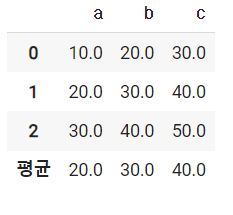